In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
test_ids = test['PassengerId']
train=train.drop(['Name', 'PassengerId'],axis=1)
test=test.drop(['Name','PassengerId'],axis=1)
all_data=pd.concat([train.iloc[:,:11],test],ignore_index=True)

conv_dict={'HomePlanet':{'Europa':0,'Earth':1,'Mars':2},
       'CryoSleep':{False:0,True:1},
       'Destination':{'TRAPPIST-1e':0,'55 Cancri e':1,'PSO J318.5-22':2},
      'VIP':{True:1,False:0}

     }
all_data=all_data.replace(conv_dict)
train=train.replace(conv_dict)
test=test.replace(conv_dict)

all_data
train['Transported']=train['Transported'].replace({True:1,False:0})

train




/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_1685/1251242174.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data=all_data.replace(conv_dict)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_1685/1251242174.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train=train.replace(conv_dict)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_1685/1251242174.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,B/0/P,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,F/0/S,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,0.0,A/0/S,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,0.0,A/0/S,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1.0,0.0,F/1/S,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,A/98/P,1.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,1.0,1.0,G/1499/S,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8690,1.0,0.0,G/1500/S,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1
8691,0.0,0.0,E/608/S,1.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0


In [2]:
train['Cabin']=train['Cabin'].str[0]
test['Cabin']=test['Cabin'].str[0]
all_data['Cabin']=all_data['Cabin'].str[0]
train['Cabin'].value_counts()
conver_dict={'F':0,'G':1,'E':2,'B':3,'C':4,'D':5,'A':6,'T':7}
train['Cabin']=train['Cabin'].replace(conver_dict)
test['Cabin']=test['Cabin'].replace(conver_dict)

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_1685/3361855980.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Cabin']=train['Cabin'].replace(conver_dict)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_1685/3361855980.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Cabin']=test['Cabin'].replace(conver_dict)


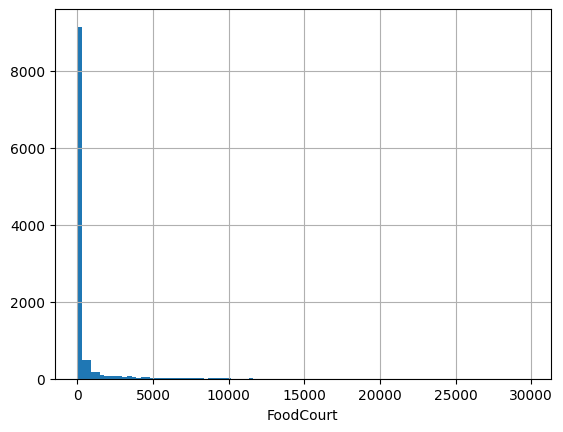

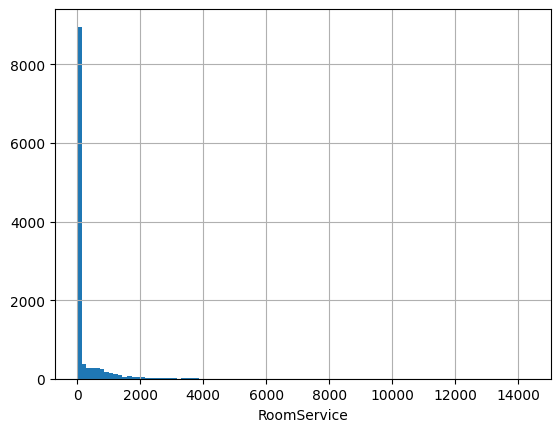

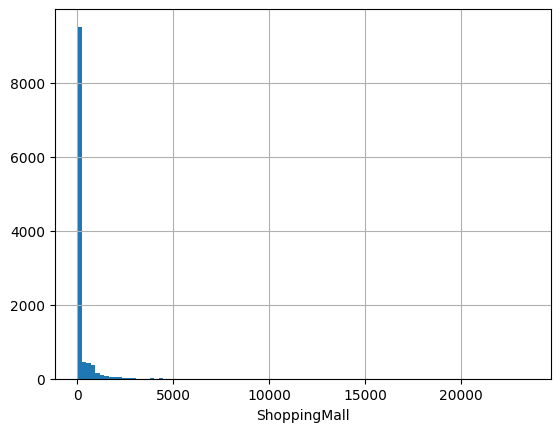

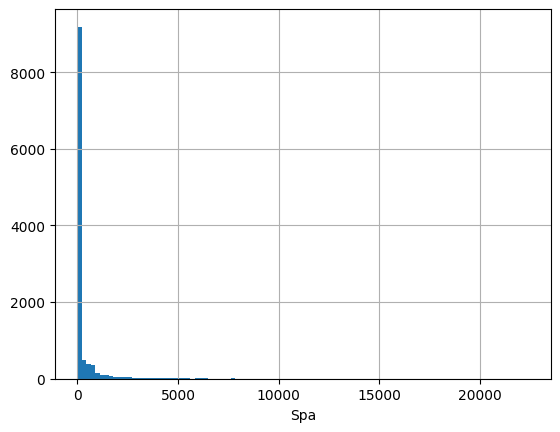

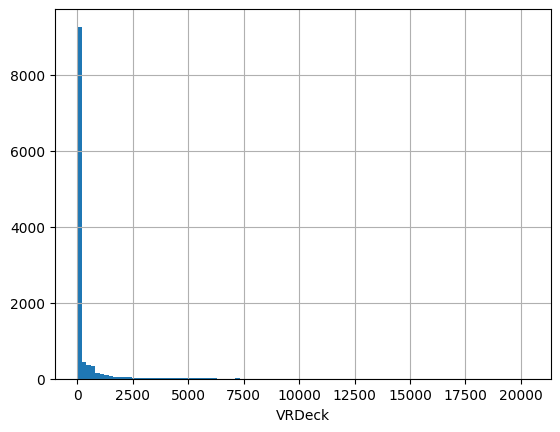

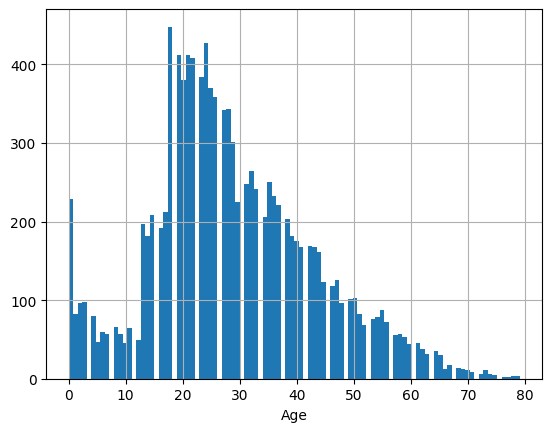

In [3]:
data=all_data[['FoodCourt','RoomService','ShoppingMall','Spa','VRDeck','Age']].dropna()
for name in data.columns:
  data[name].hist(bins=100)
  plt.xlabel(name)
  plt.show()

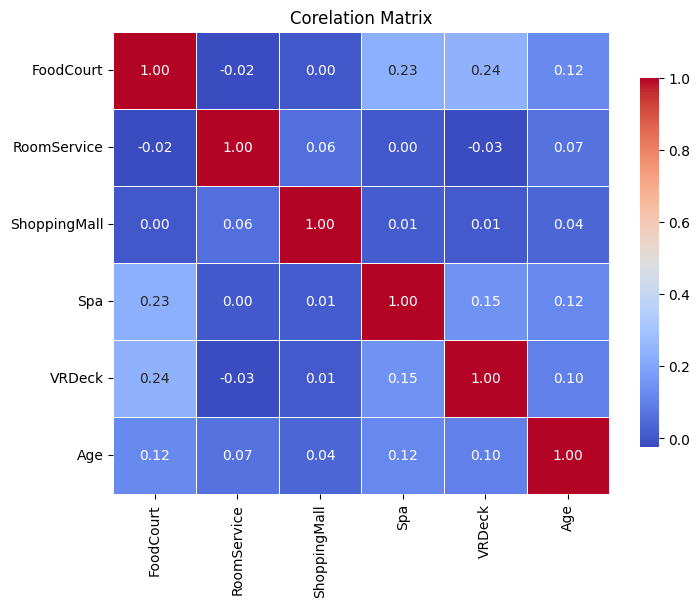

In [4]:
import seaborn as sns

corr_matrix = data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})


plt.title('Corelation Matrix')
plt.show()

<Axes: >

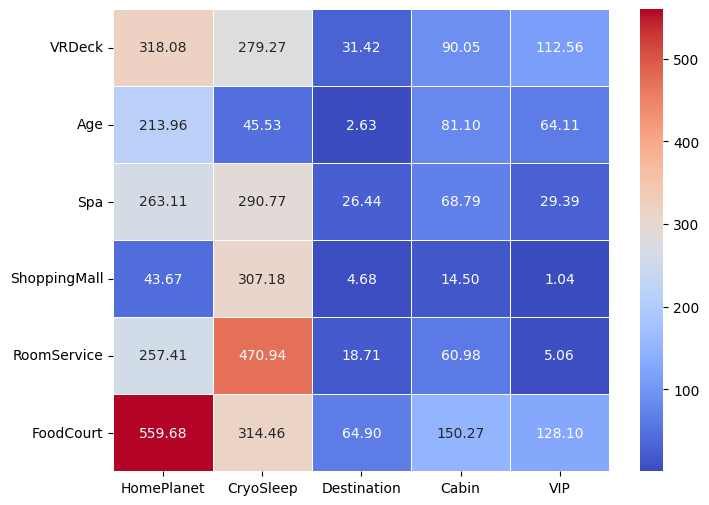

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, f_oneway

data=train.dropna()

continuous_cols = ['VRDeck','Age','Spa','ShoppingMall','RoomService','FoodCourt']
categorical_cols = ['HomePlanet' 	,'CryoSleep','Destination','Cabin','VIP']


correlation_matrix = pd.DataFrame(index=continuous_cols, columns=categorical_cols)
p_value_matrix=pd.DataFrame(index=continuous_cols, columns=categorical_cols)

for cont_col in continuous_cols:
    for cat_col in categorical_cols:



            grouped = [data[cont_col][data[cat_col] == cat] for cat in data[cat_col].unique()]
            f_stat, p_value = f_oneway(*grouped)
            correlation_matrix.loc[cont_col, cat_col] = f_stat
            p_value_matrix.loc[cont_col, cat_col]=p_value

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix.astype(float),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)



<Axes: >

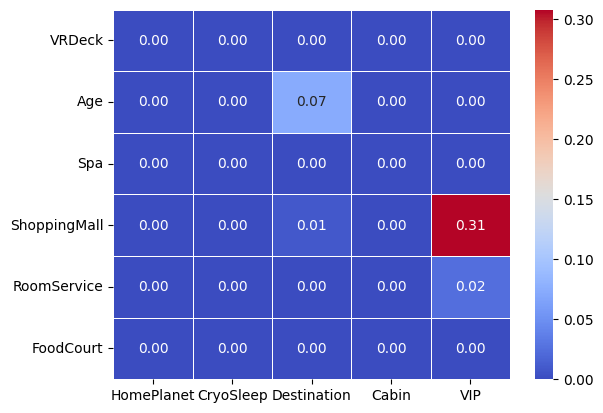

In [6]:
sns.heatmap(p_value_matrix.astype(float),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

<Figure size 800x600 with 0 Axes>

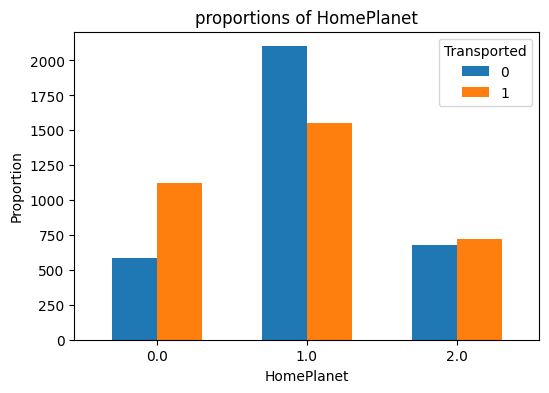

<Figure size 800x600 with 0 Axes>

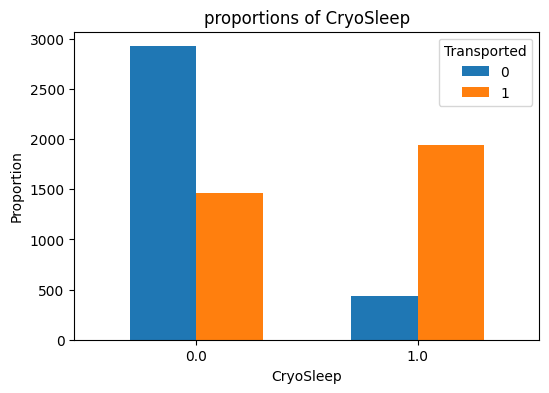

<Figure size 800x600 with 0 Axes>

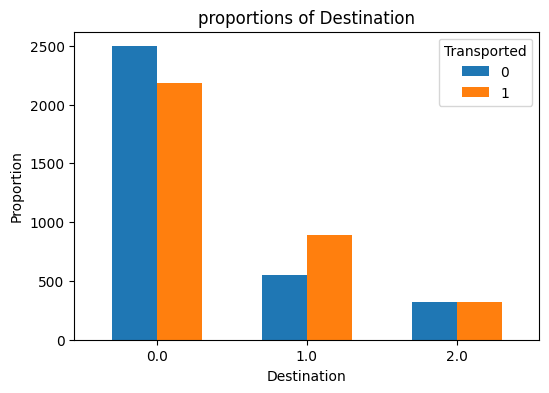

<Figure size 800x600 with 0 Axes>

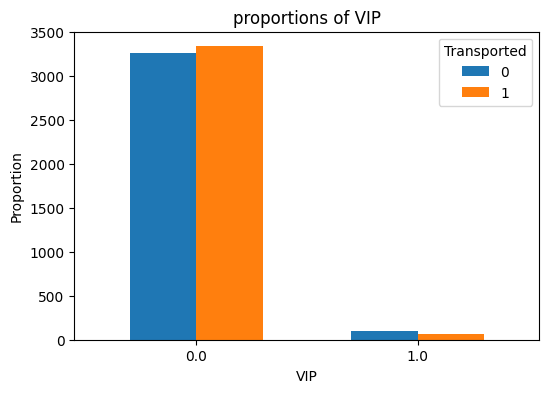

<Figure size 800x600 with 0 Axes>

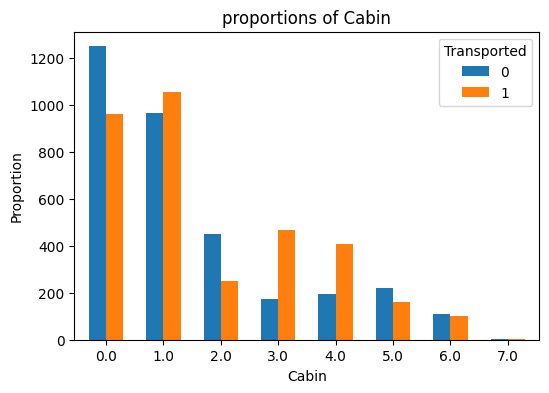

In [7]:
data=train.dropna()[['HomePlanet','CryoSleep','Destination','VIP','Transported','Cabin']]

for feature in data.drop(columns='Transported'):
    plt.figure(figsize=(8, 6))


    counts = data.groupby([feature, 'Transported']).size().unstack(fill_value=0)



    counts.plot(kind='bar',  figsize=(6, 4), width=0.6)


    plt.title(f'proportions of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.show()

In [8]:
train_new = train[['CryoSleep','FoodCourt','RoomService','ShoppingMall','Spa','VRDeck']]
X = train_new[train_new['CryoSleep'] == 1.0]
X = X[['FoodCourt','RoomService','ShoppingMall','Spa','VRDeck']]
X = X.fillna(0)




train_new.loc[X.index, ['FoodCourt','RoomService','ShoppingMall','Spa','VRDeck']] = X
train[['CryoSleep','FoodCourt','RoomService','ShoppingMall','Spa','VRDeck']]=train_new



train_new0=train_new[['CryoSleep']]
train_new0['Sum']=train_new[['FoodCourt','RoomService','ShoppingMall','Spa','VRDeck']].sum(axis=1)
y=train_new0[train_new0['Sum']==0.0]
y=y.fillna(1)
train_new.loc[y.index,['CryoSleep']]=y['CryoSleep']
z=train_new0[train_new0['Sum']!=0.0]
z=z.fillna(0.0)
train_new.loc[z.index,['CryoSleep']]=z['CryoSleep']
train[['CryoSleep','FoodCourt','RoomService','ShoppingMall','Spa','VRDeck']]=train_new


/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_1685/1959414187.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new0['Sum']=train_new[['FoodCourt','RoomService','ShoppingMall','Spa','VRDeck']].sum(axis=1)


In [13]:
train=train.drop(['VIP','Age','Destination'],axis=1)
test=test.drop(['VIP','Age','Destination'],axis=1)
train

,HomePlanet,CryoSleep,Cabin,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,0.0,6.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,0.0,6.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1.0,0.0,0.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...
8687,0.0,0.0,6.0,0.0,3208.0,0.0,2.0,330.0,1
8688,0.0,0.0,6.0,0.0,6819.0,0.0,1643.0,74.0,0
8690,1.0,0.0,1.0,0.0,0.0,1872.0,1.0,0.0,1
8691,0.0,0.0,2.0,0.0,1049.0,0.0,353.0,3235.0,0


In [10]:
data = train[train['CryoSleep'] == 1.0]

# Drop rows directly by passing index values
train = train.drop(data[data['Transported'] == 0].index)
train


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,3.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,0.0,6.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,0.0,6.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1.0,0.0,0.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8687,0.0,0.0,6.0,0.0,30.0,0.0,0.0,3208.0,0.0,2.0,330.0,1
8688,0.0,0.0,6.0,1.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0
8690,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1
8691,0.0,0.0,2.0,1.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
data=train.dropna()
X=data.drop(['Transported'],axis=1).values
y=data['Transported'].values
model=RandomForestClassifier(n_estimators=40,max_depth=10,min_samples_split=5)
metrics=cross_val_score(model,X,y,cv=10,scoring='f1_macro')
metrics.mean()

0.8605399636516985

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
pred_y = model.fit(X, y).predict(X_test)
accuracy_score(y_test, pred_y)

0.8977702986958351

In [22]:
test_ids

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [23]:
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Transported': pred_y
})

submission.replace({'Transported': {0: False, 1: True}}, inplace=True)

submission.to_csv('submission_lastversion.csv', index=False)

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_1685/32915356.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  submission.replace({'Transported': {0: False, 1: True}}, inplace=True)
